In [1]:
# newapi的範例
# https://newsapi.org/docs/client-libraries/python
# newapi的函式庫
# https://newsapi.org/docs/endpoints/everything

Building prefix dict from /Users/john19968010/Desktop/self-study/python 文字雲/jieba-zh_TW/jieba/dict.txt ...
Dumping model to file cache /var/folders/yn/7s1mn7_d7wn0cssgr5v87py40000gn/T/jieba.u49e636fb6e4752bd67a4aee8a106bd3e.cache
Loading model cost 0.814 seconds.
Prefix dict has been built successfully.


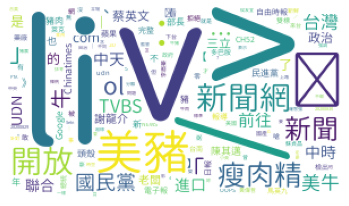

In [17]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import jieba
import numpy as np
from collections import Counter
import nltk
from newsapi import NewsApiClient
import requests

newsapi = NewsApiClient(api_key='db6f518f7a5349d98c710da1bcae06b9')
res =requests.get('https://newsapi.org/v2/top-headlines?country=tw&category=business&q=美豬from=2020-08-30&to=2020-08-30&sortBy=popularity&apiKey=db6f518f7a5349d98c710da1bcae06b9')
news = newsapi.get_everything(q='美豬',
                              language='zh',
                              from_param='2020-08-30',
                              to='2020-08-30',
                              sort_by='popularity',)
des = ""
for i in news['articles']:
    des += i['description']

    
jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') 

with open('jieba-zh_TW/jieba/stop_word.txt', 'r',encoding="utf-8") as f:
    stops = f.read().split('\n')

terms = []
for t in jieba.cut(des, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)

# 從 Google 下載的中文字型
font = 'GenJyuuGothicX-P-Normal.ttf'
mask = np.array(Image.open("output.png"))
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font)
wordcloud.generate_from_frequencies(diction)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("new_Wordcloud.png")

In [2]:
import jieba

In [ ]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='db6f518f7a5349d98c710da1bcae06b9')

In [5]:
import jieba

sentence = '我今天要到台北松山機場出差'
breakword = jieba.cut(sentence)
print('|'.join(breakword))#也可以用list的方式呈現

我|今天|要|到|台北|松山|機場|出差


In [4]:
#精準模式 jieba.cut(,cut_all=False) 最精準的方式斷句,是合作文件分析,也是預設值
#全文模式 jieba.cut(,cut_all=True) 將可以成詞的字都搜瞄出來,速度最快
#搜索引擎模式 jieba.cut_for_search() 在精準模式上載隊長詞做切分,適合搜尋引擎斷詞

import jieba

sentence1 = '我今天要到台北松山機場出差'
breakword = jieba.cut(sentence,cut_all=False)
print('精準模式：' + '|'.join(breakword))

breakword = jieba.cut(sentence,cut_all=True)
print('全文模式：' + '|'.join(breakword))

breakword = jieba.cut_for_search(sentence)
print('搜索引擎模式：' + '|'.join(breakword))

精準模式：我|今天|要|到|台北|松山|機場|出差
全文模式：我|今天|要到|台北|松山|機|場|出差
搜索引擎模式：我|今天|要|到|台北|松山|機場|出差


In [10]:
#設置詞庫檔案路徑
jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt')
sentence1 = '我今天要到台北松山機場出差'
breakword = jieba.cut(sentence1)
print('|'.join(breakword))

Building prefix dict from /Users/john19968010/Desktop/jieba-zh_TW/jieba/dict.txt ...
Loading model from cache /var/folders/yn/7s1mn7_d7wn0cssgr5v87py40000gn/T/jieba.u7d07102f7121e30353399331d12b1291.cache
Loading model cost 0.678 seconds.
Prefix dict has been built successfully.


我|今天|要|到|台北|松山|機場|出差


In [32]:
import jieba

jieba.load_userdict('jieba-zh_TW/jieba/my_dict.txt') #設定自定義詞庫
# jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') #設定繁體中文詞庫

a = '前幾天,蔡英文今天要到松山機場出差'
b = jieba.cut(a)
print('|'.join(b))

前幾天|,|蔡英文|今天|要|到|松山機場|出差


In [34]:
#刪除標點符號
import jieba


jieba.load_userdict('jieba-zh_TW/jieba/my_dict.txt') #設定自定義詞庫
# jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') #設定繁體中文詞庫
with open('jieba-zh_TW/jieba/stop_word.txt', 'r') as f:
    stops = f.read().split('\n')


a = '前幾天,蔡英文今天要到松山機場出差'
b = jieba.cut(a)
words = []
for word in b:
    if word not in stops:
        words.append(word)

print('|'.join(words))

前幾天|蔡英文|今天|要|到|松山機場|出差


In [37]:
#文字雲
text = "今天是個好天氣,屬於晴朗的天氣,適合出遊玩的天氣"
jieba.load_userdict('jieba-zh_TW/jieba/my_dict.txt') #設定自定義詞庫
# jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') #設定繁體中文詞庫
with open('jieba-zh_TW/jieba/stop_word.txt', 'r') as f:
    stops = f.read().split('\n')



b = jieba.cut(text)
words = []
for word in b:
    if word not in stops:
        words.append(word)

print('|'.join(words))

今天|是|個|好|天氣|屬於|晴朗|的|天氣|適合|出|遊玩|的|天氣


In [40]:
#算出元素值出現次數
from collections import Counter
diction = Counter(words)

In [42]:
Counter(words)

Counter({'今天': 1,
         '是': 1,
         '個': 1,
         '好': 1,
         '天氣': 3,
         '屬於': 1,
         '晴朗': 1,
         '的': 2,
         '適合': 1,
         '出': 1,
         '遊玩': 1})

Building prefix dict from /Users/john19968010/Desktop/self-study/python 文字雲/jieba-zh_TW/jieba/dict.txt ...
Loading model from cache /var/folders/yn/7s1mn7_d7wn0cssgr5v87py40000gn/T/jieba.u49e636fb6e4752bd67a4aee8a106bd3e.cache
Loading model cost 0.798 seconds.
Prefix dict has been built successfully.


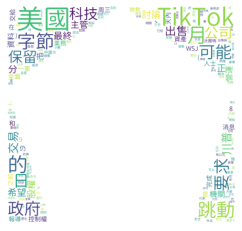

In [13]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import jieba
import numpy as np
from collections import Counter
import nltk

test = open("jieba-zh_TW/jieba/1.txt","r",encoding="utf-8").read()
    
jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') 

with open('jieba-zh_TW/jieba/stop_word.txt', 'r',encoding="utf-8") as f:
    stops = f.read().split('\n')

terms = []
for t in jieba.cut(test, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)

# 從 Google 下載的中文字型
font = 'GenJyuuGothicX-P-Normal.ttf'
mask = np.array(Image.open("aaa.png"))
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font)
wordcloud.generate_from_frequencies(diction)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("new_Wordcloud.png")

In [49]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

text = open('jieba-zh_TW/jieba/1.txt', 'r').read()
jieba.set_dictionary('jieba-zh_TW/jieba/dict.txt') 

with open('jieba-zh_TW/jieba/stop_word.txt', 'r') as f:
    stops = f.read().split('\n')

terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)

font = 'msch.ttf'
#設定文字雲形狀
# mask = np.array(Image.open("heart.png")) mask=mask
#設定背景顏色,形狀即字形
wordcloud = WordCloud(background_color="white",font_path=font)
wordcloud.generate_from_frequencies(frequencies=diction)#產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("new_Wordcloud.png")

Building prefix dict from /Users/john19968010/Desktop/jieba-zh_TW/jieba/dict.txt ...
Loading model from cache /var/folders/yn/7s1mn7_d7wn0cssgr5v87py40000gn/T/jieba.u7d07102f7121e30353399331d12b1291.cache
Loading model cost 0.674 seconds.
Prefix dict has been built successfully.


OSError: cannot open resource